In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('/home/jacob/Documents/Dust_data.csv')
sj=data['1mm flux density (Jy)']
v=data['1mm frequency (Hz)']
d=data['Distance (Mpc)']

In [6]:
def dust_mass(sj,v,d,T,v0,b):
    D=d*3.086e22
    c=3e8
    h=6.626e-34
    kb=1.38e-23
    k0=0.051
    k=k0*(v/v0)**b
    B=(2*h*v**3/c**2)*1/(np.exp(h*v/(kb*T))-1)
    S=sj*1e-26
    M=S*(D**2)/(k*B)
    m=M/2e30
    return m

In [7]:
dustmass=dust_mass(3.8e-4,2.37e11,3.01,50,6e11,2)

In [5]:
data['Dust Mass (Solar masses)']=dustmass

In [8]:
print(dustmass)

2686.197517142224


In [7]:
data.head(35)

,Galaxy,Radio Jet,Detection,1mm flux density (Jy),1mm frequency (Hz),Distance (Mpc),Dust Mass (Solar masses)
0,Frl1146,Yes,Yes,0.000903,2.320000e+11,136.700,1.430230e+07
1,FRL49,No,Yes,0.002620,2.350000e+11,85.700,1.551577e+07
2,MRK567,No,No,0.000107,2.330000e+11,140.600,1.763113e+06
3,NGC0383,Yes,Yes,0.065700,2.350000e+11,66.600,2.349764e+08
4,NGC0404,No,No,0.000037,2.370000e+11,3.010,2.587232e+02
5,NGC0449,No,Yes,0.001370,2.360000e+11,66.250,4.769168e+06
6,NGC0524,No,Yes,NaN,NaN,23.300,NaN
7,NGC0612,Yes,Yes,0.028000,2.330000e+11,130.400,3.968614e+08
8,NGC0708,Yes,Yes,0.002870,2.360000e+11,58.300,7.736942e+06
9,NGC1194,No,Yes,0.001640,2.290000e+11,53.200,4.138182e+06


In [8]:
jet=data[data['Radio Jet']=='Yes']
nojet=data[data['Radio Jet']=='No']
jetdetection=jet[jet['Detection']=='Yes']
jetnodetection=jet[jet['Detection']=='No']
nojetdetection=nojet[nojet['Detection']=='Yes']
nojetnodetetion=nojet[nojet['Detection']=='No']

Text(0, 0.5, 'Dust Mass (solar massess)')

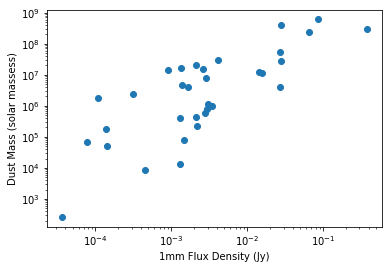

In [9]:
plt.loglog(sj,dustmass,'o')
plt.xlabel('1mm Flux Density (Jy)')
plt.ylabel('Dust Mass (solar massess)')

In [14]:
#plt.loglog(detection['1mm flux density (Jy)'],detection['Dust Mass (Solar masses)'],'o')
#plt.loglog(nodetection['1mm flux density (Jy)'],nodetection['Dust Mass (Solar masses)'],'v')
#plt.xlabel('1mm Flux Density (Jy)')
#plt.ylabel('Dust Mass (solar massess)')

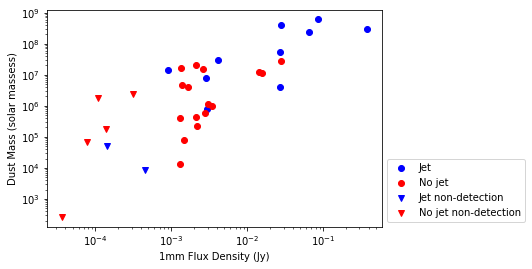

In [15]:
plt.loglog(jetdetection['1mm flux density (Jy)'],jetdetection['Dust Mass (Solar masses)'],'o',color='blue',label='Jet')
plt.loglog(nojetdetection['1mm flux density (Jy)'],nojetdetection['Dust Mass (Solar masses)'],'o',color='red',label='No jet')
plt.loglog(jetnodetection['1mm flux density (Jy)'],jetnodetection['Dust Mass (Solar masses)'],'v',color='blue',label='Jet non-detection')
plt.loglog(nojetnodetetion['1mm flux density (Jy)'],nojetnodetetion['Dust Mass (Solar masses)'],'v',color='red',label='No jet non-detection')
plt.xlabel('1mm Flux Density (Jy)')
plt.ylabel('Dust Mass (solar massess)')
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1)